In [4]:
!pip install python-bcb
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install statsmodels
!pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: ht

In [5]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import bcb as bcb
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from bcb import sgs
import linearmodels as lm

In [6]:
confianca_consumidor=sgs.get({'indice_confianca_consumidor':4393})
confianca_empresario_industrial=sgs.get({'indice_confianca_empresario':7341})
confianca_servicos=sgs.get({'indice_confianca_servicos':17660})

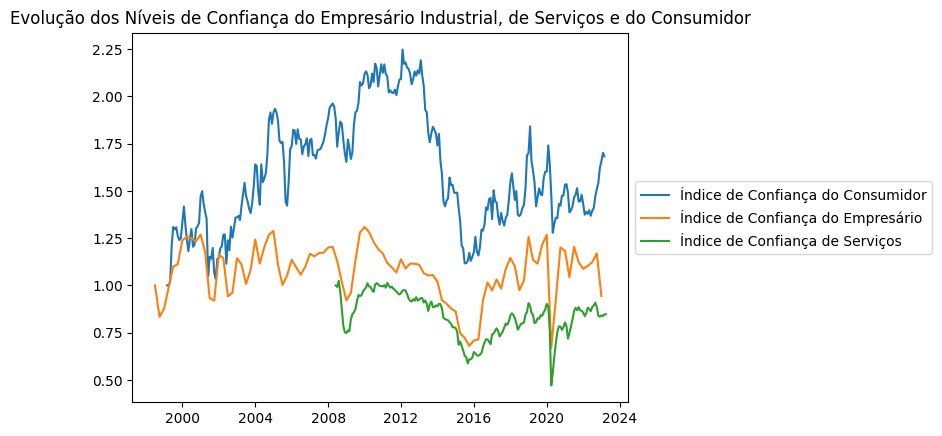

In [7]:
confianca_consumidor_indice = confianca_consumidor['indice_confianca_consumidor'] / confianca_consumidor['indice_confianca_consumidor'][0]
confianca_empresario_industrial_indice = confianca_empresario_industrial['indice_confianca_empresario'] / confianca_empresario_industrial['indice_confianca_empresario'][0]
confianca_servicos_indice = confianca_servicos['indice_confianca_servicos'] / confianca_servicos['indice_confianca_servicos'][0]

plt.plot(confianca_consumidor_indice, label = 'Índice de Confiança do Consumidor')
plt.plot(confianca_empresario_industrial_indice, label = 'Índice de Confiança do Empresário')
plt.plot(confianca_servicos_indice, label = 'Índice de Confiança de Serviços')
plt.title('Evolução dos Níveis de Confiança do Empresário Industrial, de Serviços e do Consumidor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

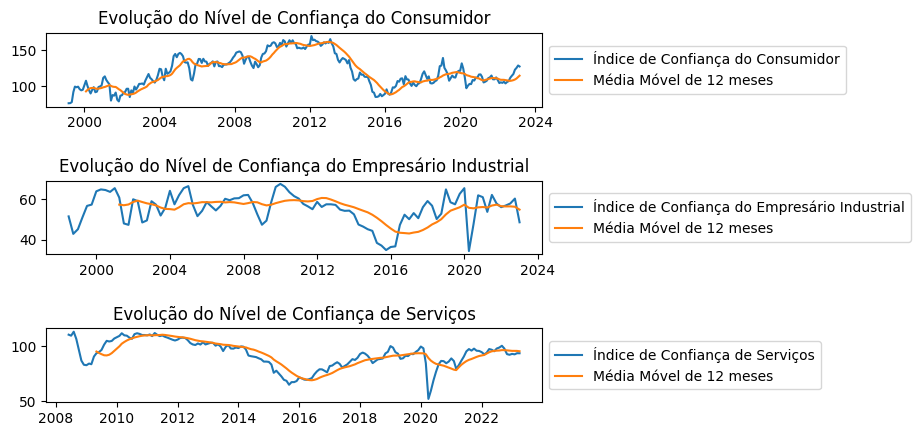

In [8]:
confianca_consumidor['confianca_consumidor_mm12'] = confianca_consumidor['indice_confianca_consumidor'].rolling(window=12).mean()
confianca_empresario_industrial['confianca_empresario_mm12'] = confianca_empresario_industrial['indice_confianca_empresario'].rolling(window=12).mean()
confianca_servicos['confianca_servicos_mm12'] = confianca_servicos['indice_confianca_servicos'].rolling(window=12).mean()
plt.subplots_adjust(hspace=1.0, wspace=0.2)
plt.subplot(311)
plt.plot(confianca_consumidor['indice_confianca_consumidor'], label='Índice de Confiança do Consumidor')
plt.plot(confianca_consumidor['confianca_consumidor_mm12'], label='Média Móvel de 12 meses')
plt.title('Evolução do Nível de Confiança do Consumidor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplot(312)
plt.plot(confianca_empresario_industrial['indice_confianca_empresario'], label='Índice de Confiança do Empresário Industrial')
plt.plot(confianca_empresario_industrial['confianca_empresario_mm12'], label='Média Móvel de 12 meses')
plt.title('Evolução do Nível de Confiança do Empresário Industrial')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplot(313)
plt.plot(confianca_servicos['indice_confianca_servicos'], label='Índice de Confiança de Serviços')
plt.plot(confianca_servicos['confianca_servicos_mm12'], label='Média Móvel de 12 meses')
plt.title('Evolução do Nível de Confiança de Serviços')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [9]:
confianca_consumidor.drop(columns={'confianca_consumidor_mm12'}, inplace=True)
confianca_empresario_industrial.drop(columns={'confianca_empresario_mm12'}, inplace=True)
confianca_servicos.drop(columns={'confianca_servicos_mm12'}, inplace=True)

confianca_consumidor['Data'] = confianca_consumidor.index
confianca_empresario_industrial['Data'] = confianca_empresario_industrial.index
confianca_servicos['Data'] = confianca_servicos.index

confianca_consumidor['Data'] = pd.to_datetime(confianca_consumidor['Data'])
confianca_empresario_industrial['Data'] = pd.to_datetime(confianca_empresario_industrial['Data'])
confianca_servicos['Data'] = pd.to_datetime(confianca_servicos['Data'])

dummies_confianca_consumidor = pd.get_dummies(confianca_consumidor['Data'].dt.month, prefix='Mes')
dummies_confianca_empresario_industrial = pd.get_dummies(confianca_empresario_industrial['Data'].dt.month, prefix='Mes')
dummies_confianca_servicos = pd.get_dummies(confianca_servicos['Data'].dt.month, prefix='Mes')

confianca_consumidor = confianca_consumidor.join(dummies_confianca_consumidor)
confianca_empresario_industrial = confianca_empresario_industrial.join(dummies_confianca_empresario_industrial)
confianca_servicos = confianca_servicos.join(dummies_confianca_servicos)

In [10]:
modelo_confianca_consumidor=smf.ols(formula='indice_confianca_consumidor ~ Mes_1 + Mes_2 + Mes_3 + Mes_4 + Mes_5 + Mes_6 + Mes_7 + Mes_8 + Mes_9 + Mes_10 + Mes_11 + Mes_12', data= confianca_consumidor)
modelo_confianca_empresario=smf.ols(formula='indice_confianca_empresario ~ Mes_1 + Mes_4 + Mes_7 + Mes_10', data= confianca_empresario_industrial)
modelo_confianca_servicos=smf.ols(formula='indice_confianca_servicos ~ Mes_1 + Mes_2 + Mes_3 + Mes_4 + Mes_5 + Mes_6 + Mes_7 + Mes_8 + Mes_9 + Mes_10 + Mes_11 + Mes_12', data= confianca_servicos)

resultado_confianca_consumidor=modelo_confianca_consumidor.fit()
resultado_confianca_empresario=modelo_confianca_empresario.fit()
resultado_confianca_servicos=modelo_confianca_servicos.fit()


In [12]:
resultado_confianca_consumidor.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     indice_confianca_consumidor   R-squared:                       0.024
Model:                                     OLS   Adj. R-squared:                 -0.014
Method:                          Least Squares   F-statistic:                    0.6314
Date:                         Wed, 17 May 2023   Prob (F-statistic):              0.801
Time:                                 03:03:19   Log-Likelihood:                -1311.2
No. Observations:                          289   AIC:                             2646.
Df Residuals:                              277   BIC:                             2690.
Df Model:                                   11                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.3576      1.254     88.820      0.000     108.890     113.826
Mes_1         13.5261      4.513      2.997      0.003       4.642      22.410
Mes_2         17.7719      4.513      3.938      0.000       8.888      26.656
Mes_3         11.3272      4.429      2.558      0.011       2.609      20.046
Mes_4          8.2174      4.513      1.821      0.070      -0.667      17.101
Mes_5          6.5028      4.513      1.441      0.151      -2.381      15.387
Mes_6          5.4674      4.513      1.211      0.227      -3.417      14.351
Mes_7          6.1369      4.513      1.360      0.175      -2.747      15.021
Mes_8          5.5315      4.513      1.226      0.221      -3.352      14.415
Mes_9          7.5844      4.513      1.681      0.094      -1.299      16.468
Mes_10         7.7815      4.513      1.724      0.086      -1.102      16.665
Mes_11         9.5365      4.513      2.113      0.035       0.653      18.420
Mes_12        11.9740      4.513      2.653      0.008       3.090      20.858
==============================================================================
Omnibus:                       29.552   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.657
Skew:                           0.334   Prob(JB):                      0.00108
Kurtosis:                       2.170   Cond. No.                     7.82e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.11e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
resultado_confianca_empresario.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     indice_confianca_empresario   R-squared:                       0.029
Model:                                     OLS   Adj. R-squared:                 -0.002
Method:                          Least Squares   F-statistic:                    0.9329
Date:                         Wed, 17 May 2023   Prob (F-statistic):              0.428
Time:                                 03:03:22   Log-Likelihood:                -337.08
No. Observations:                           99   AIC:                             682.2
Df Residuals:                               95   BIC:                             692.5
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.2211      0.598     73.941      0.000      43.034      45.408
Mes_1         13.0760      1.298     10.073      0.000      10.499      15.653
Mes_4         10.1426      1.319      7.688      0.000       7.524      12.762
Mes_7          9.9116      1.298      7.635      0.000       7.335      12.489
Mes_10        11.0909      1.298      8.544      0.000       8.514      13.668
==============================================================================
Omnibus:                       14.792   Durbin-Watson:                   0.592
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.356
Skew:                          -0.949   Prob(JB):                     0.000281
Kurtosis:                       3.605   Cond. No.                     1.03e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [14]:
resultado_confianca_servicos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     indice_confianca_servicos   R-squared:                       0.014
Model:                                   OLS   Adj. R-squared:                 -0.051
Method:                        Least Squares   F-statistic:                    0.2087
Date:                       Wed, 17 May 2023   Prob (F-statistic):              0.997
Time:                               03:03:25   Log-Likelihood:                -702.26
No. Observations:                        179   AIC:                             1429.
Df Residuals:                            167   BIC:                             1467.
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     85.6970      0.874     98.041      0.000      83.971      87.423
Mes_1          8.7897      3.133      2.806      0.006       2.605      14.975
Mes_2          8.6563      3.133      2.763      0.006       2.471      14.841
Mes_3          6.6697      3.133      2.129      0.035       0.485      12.855
Mes_4          5.0897      3.133      1.625      0.106      -1.095      11.275
Mes_5          4.5173      3.234      1.397      0.164      -1.868      10.903
Mes_6          5.6230      3.133      1.795      0.074      -0.562      11.808
Mes_7          6.6430      3.133      2.120      0.035       0.458      12.828
Mes_8          8.5697      3.133      2.735      0.007       2.385      14.755
Mes_9          8.9363      3.133      2.852      0.005       2.751      15.121
Mes_10         8.0630      3.133      2.574      0.011       1.878      14.248
Mes_11         7.0030      3.133      2.235      0.027       0.818      13.188
Mes_12         7.1363      3.133      2.278      0.024       0.951      13.321
==============================================================================
Omnibus:                        6.917   Durbin-Watson:                   0.092
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.184
Skew:                          -0.483   Prob(JB):                       0.0275
Kurtosis:                       2.829   Cond. No.                     8.76e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.53e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
def test_stationarity(timeseries):
    
    # Determinar as estatísticas móveis
    rolmean = timeseries.rolling(2).mean()
    rolstd = timeseries.rolling(2).std()

    # Criar a grade de subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # Plotar os gráficos de orig, mean e std
    axs[0].plot(timeseries, color='blue', label='Original')
    axs[0].plot(rolmean, color='red', label='Rolling Mean')
    axs[0].plot(rolstd, color='black', label='Rolling Std')
    axs[0].legend(loc='best')
    axs[0].set_title('Teste de Estacionariedade')

    # Realizar o teste de Dickey-Fuller
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    # Ajustar o espaçamento entre os subplots
    plt.tight_layout()

    # Exibir apenas a parte das estatísticas sem gráfico vazio
    axs[1].axis('off')
    axs[1].text(0, 0.5, dfoutput.to_string(), fontsize=10, verticalalignment='center')

    # Exibir o gráfico
    plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -2.501903
p-value                          0.115012
#Lags Used                       0.000000
Number of Observations Used    288.000000
Critical Value (1%)             -3.453262
Critical Value (5%)             -2.871628
Critical Value (10%)            -2.572146
dtype: float64


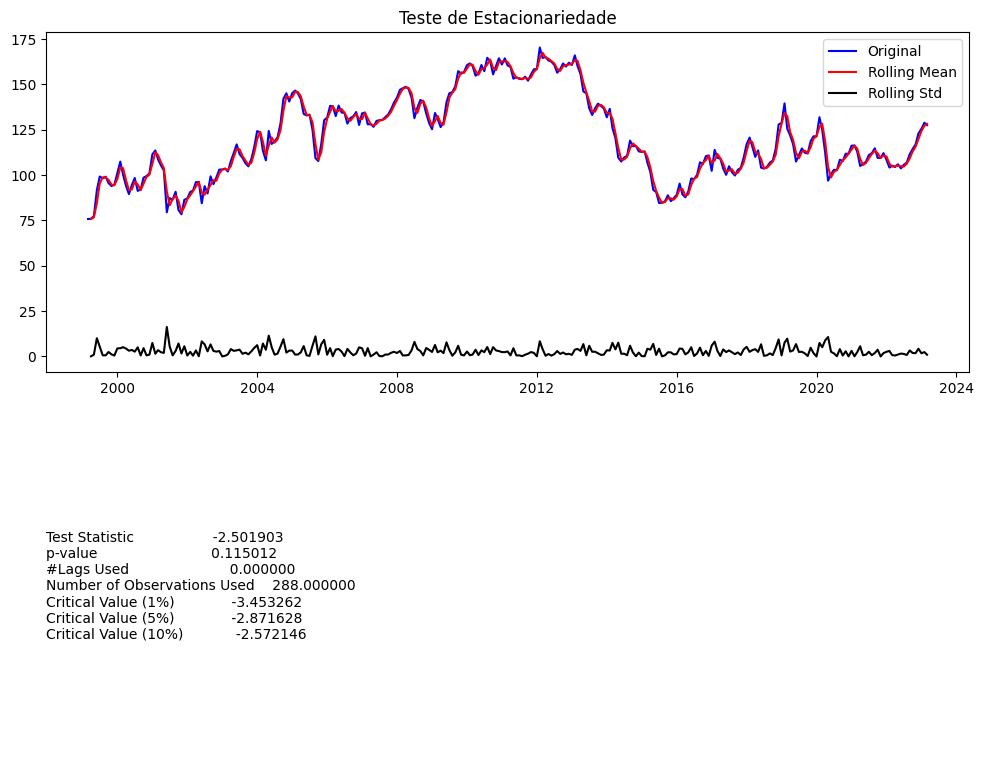

In [16]:
test_stationarity(confianca_consumidor['indice_confianca_consumidor'])

Results of Dickey-Fuller Test:
Test Statistic                 -2.662045
p-value                         0.080840
#Lags Used                      5.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


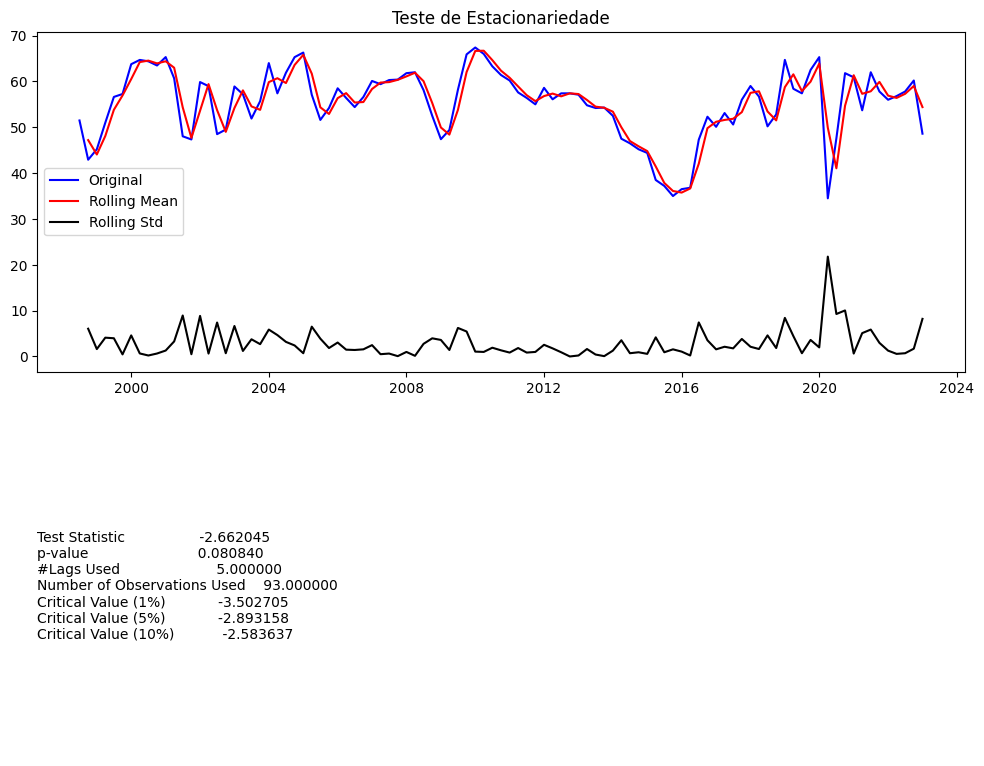

In [17]:
test_stationarity(confianca_empresario_industrial['indice_confianca_empresario'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.940972
p-value                          0.313039
#Lags Used                      11.000000
Number of Observations Used    167.000000
Critical Value (1%)             -3.470126
Critical Value (5%)             -2.879008
Critical Value (10%)            -2.576083
dtype: float64


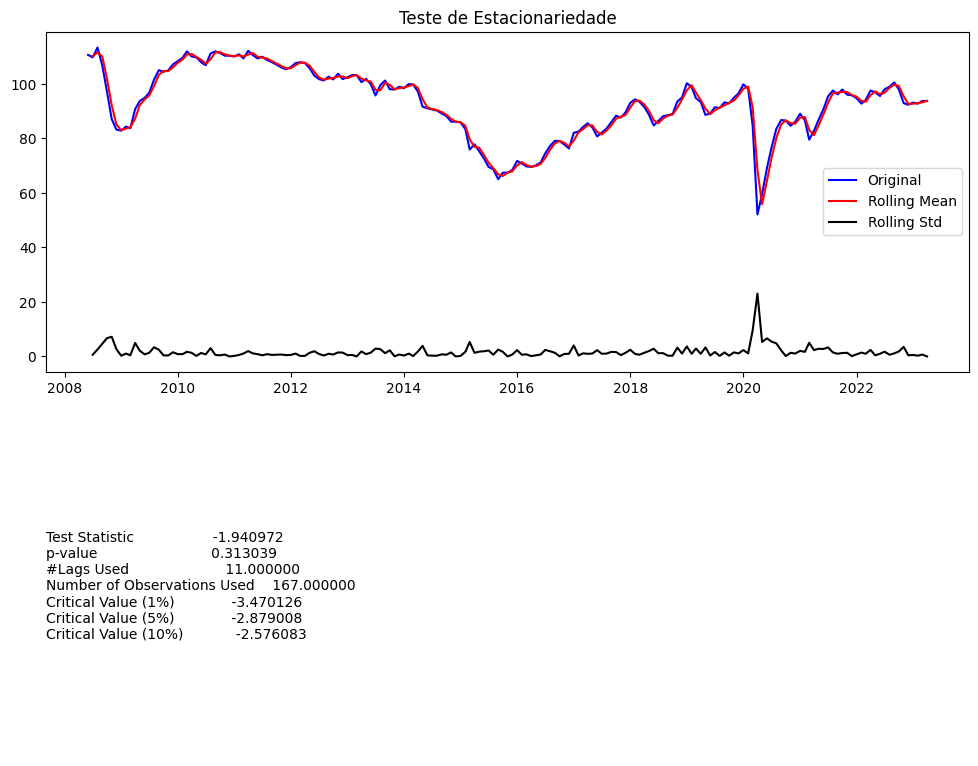

In [18]:
test_stationarity(confianca_servicos['indice_confianca_servicos'])

In [19]:
indice_confianca_consumidor=pd.DataFrame(confianca_consumidor['indice_confianca_consumidor'])
indice_confianca_empresario=pd.DataFrame(confianca_empresario_industrial['indice_confianca_empresario'])
indice_confianca_servicos=pd.DataFrame(confianca_servicos['indice_confianca_servicos'])

In [22]:
dados=pd.merge(indice_confianca_consumidor,indice_confianca_empresario, on='Date', how='inner')
dados=pd.merge(dados,indice_confianca_servicos, on='Date', how='inner')

In [23]:
modelo=smf.ols(formula='indice_confianca_consumidor ~ indice_confianca_empresario + indice_confianca_servicos', data=dados)
resultados=modelo.fit()
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     indice_confianca_consumidor   R-squared:                       0.659
Model:                                     OLS   Adj. R-squared:                  0.647
Method:                          Least Squares   F-statistic:                     54.04
Date:                         Wed, 17 May 2023   Prob (F-statistic):           8.46e-14
Time:                                 03:04:14   Log-Likelihood:                -237.40
No. Observations:                           59   AIC:                             480.8
Df Residuals:                               56   BIC:                             487.0
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -9.8139     13.769     -0.713      0.479     -37.397      17.769
indice_confianca_empresario    -0.5672      0.375     -1.511      0.136      -1.319       0.185
indice_confianca_servicos       1.7745      0.239      7.414      0.000       1.295       2.254
==============================================================================
Omnibus:                        9.469   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.036
Skew:                           0.707   Prob(JB):                      0.00662
Kurtosis:                       4.444   Cond. No.                         825.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
residuos=resultados.resid

Results of Dickey-Fuller Test:
Test Statistic                 -4.012253
p-value                         0.001348
#Lags Used                      0.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


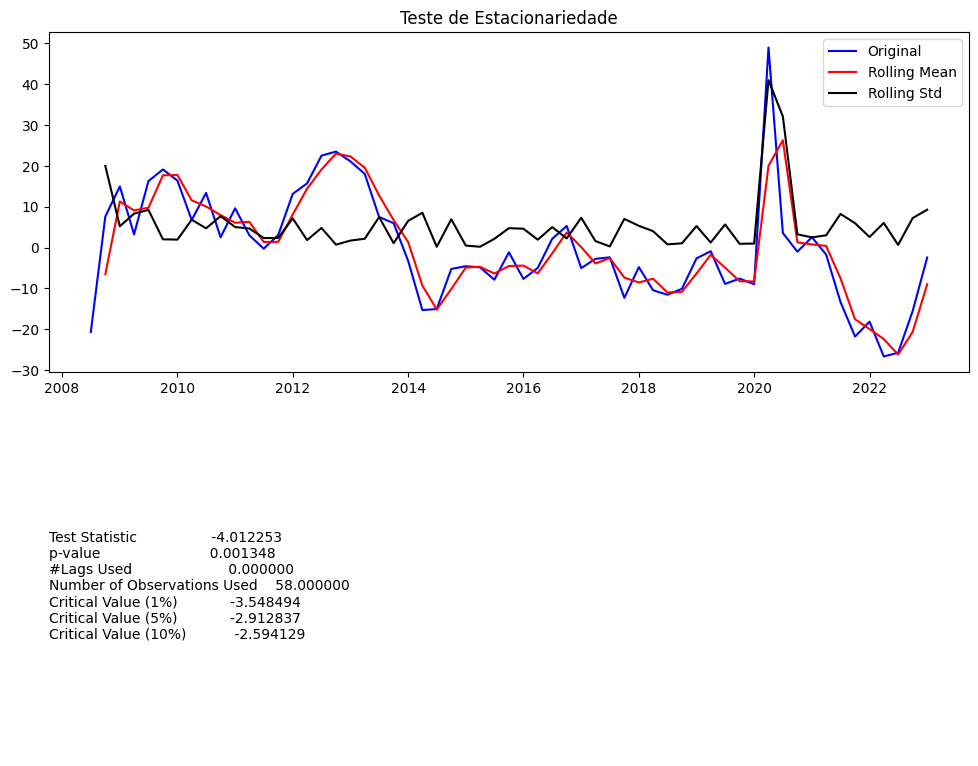

In [25]:
test_stationarity(residuos)